# Programming Assignment \# 1

__Goal:__ 

This programming assignment will ask you to do the following tasks.

(a) Implement some of the sorting algorithms for sorting integer data in ascending order in python3.
  - Simple sort (implemented for you)
  - Bubble Sort (read from book or online sources)
  - Merge Sort
  - Quicksort 
  
  
(b) Your implementation must count the number of *compare* operations each sorting algorithm carries out.
    
(c) You must formulate a series of arrays of lengths from $5$ to $100$  (step by 5), that will form the worst case of these
sorting algorithms and plot the number of comparisons in the __worst case__ vs. size of input array (x axis)
 
(d) Generate $1000$ random inputs for each size and compute average time. Plot the size of input array (x axis) vs. number of comparisons (y axis)

----
## Simple Sort

In [24]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import time
import matplotlib.pyplot as plt

def simple_sort(a):
    # must sort the array a in place and return the number of comparisons
    num_compare = 0
    n = len(a)
    for i in range(0, n): # i goes from 0 to n-1
        for j in range(i+1, n): # j goes from i+1 to n-1
            num_compare = num_compare + 1
            if a[i] >= a[j]:
                # swap
                a[i], a[j] = a[j], a[i]
    return num_compare

In [25]:
# TESTING CODE
a = [3, 10, 1, 29, -1, 4, 3, 15, 2, -2]
nc = simple_sort(a)
print('Num Comparison = ', nc)
print('Sorted Result = ', a)

Num Comparison =  45
Sorted Result =  [-2, -1, 1, 2, 3, 3, 4, 10, 15, 29]


### Complexity analysis of simple sort.

Note that simple sort consists of two loops and regardless of the input array, the first loop runs from n steps. And the second loop runs $n-i-1$ steps where $i$ is the index of the first loop. Thus, the worst case, best case and average case complexity should be $\sum_{j=1}^{n-1} j = \frac{n(n-1)}{2}$ comparisons = $\Theta(n^2)$

The code below plots it for arrays of size 5, 10, ..., 100. However, we cannot really distinguish between the number of comparisons for randomized vs. worst case.

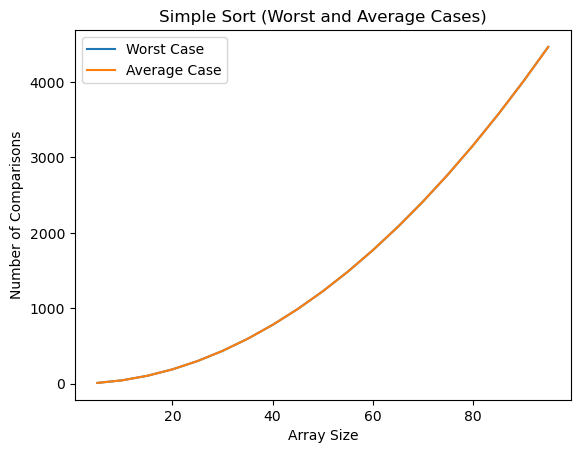

In [19]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = simple_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = simple_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Simple Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----

### Bubble Sort

In [27]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def bubble_sort(a):
    # Implement code to bubble sort the given array a in place.
    # Also return the number of comparisons. 
    num_compares = 0
    n = len(a)
    for i in range(n-1):
        for j in range(n-i-1):
            num_compares = num_compares + 1
            if a[j] > a[j+1]:
                temp = a[j]
                a[j] = a[j + 1]
                a[j+1] = temp
    return num_compares

### Complexity Analysis of Bubble Sort

Worst case scenario: the array is in descending/reverse order, so every element has to slowly traverse the entire array on every iteration, so we have the maximum number of comparison operations and maximum number of swap operations.
Average case scenario: Although the average case would result in fewer comparison operations, there's still a possibility that every element in the array will need to be compared and swapped.
Both the worst and average cases have complexity of O(n^2)

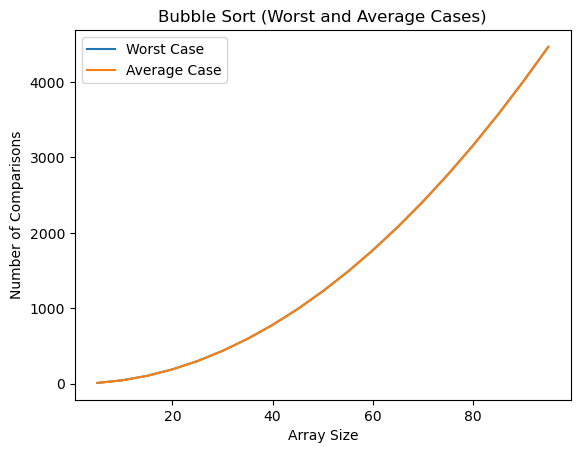

In [29]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an array sorted in descending order
def create_descending_sorted_array(a_size):
    a = []
    for i in range(a_size, 0, -1):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_sorted_array(n)
    nc = bubble_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = bubble_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Bubble Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Merge Sort

In [71]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def merge_sort(a):
    comparisons = [0]  # Counter to keep track of comparisons made

    def merge(left, right):
        merged = []
        i = j = 0
        while i < len(left) and j < len(right):
            comparisons[0] += 1
            if left[i] <= right[j]:
                merged.append(left[i])
                i += 1
            else:
                merged.append(right[j])
                j += 1
        merged.extend(left[i:])
        merged.extend(right[j:])
        return merged

    def merge_sort_recursive(arr):
        if len(arr) <= 1:
            return arr
        mid = len(arr) // 2
        left_half = merge_sort_recursive(arr[:mid])
        right_half = merge_sort_recursive(arr[mid:])
        return merge(left_half, right_half)

    a[:] = merge_sort_recursive(a) 
    return comparisons[0]

### Complexity Analysis of Merge Sort

The worst-case scenario for merge sort occurs when the array is in reverse sorted order, so just give it an array already sorted in descending order.In this scenario, every time the array is divided, it's split into two subarrays of nearly equal size, so the merge operation at each level of the recursion tree has to merge arrays of almost the maximum length.
Average case is if the provided array is in random order. Both worst case and average case are 0(nlogn). even best case scenario is the same.


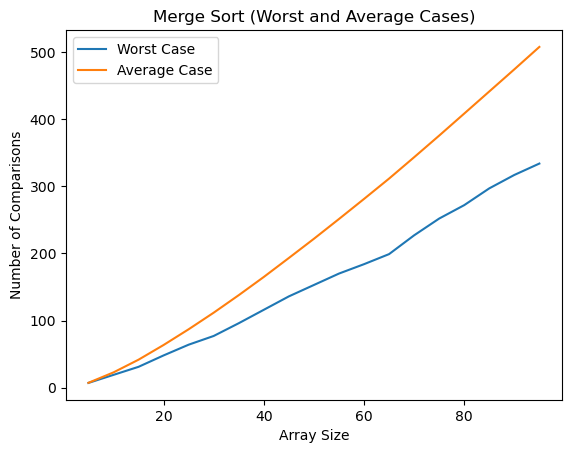

In [72]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_descending_sorted_array(a_size):
    a = []
    for i in range(a_size, 0, -1):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_descending_sorted_array(n)
    nc = merge_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = merge_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Merge Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

----
### Quick Sort


In [73]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def quick_sort(a):
    comparisons = [0] 

    def partition(a, low, high):
        pivot = a[high]
        i = low - 1
        for j in range(low, high):
            comparisons[0] += 1
            if a[j] <= pivot:
                i += 1
                a[i], a[j] = a[j], a[i]
        a[i + 1], a[high] = a[high], a[i + 1]
        return i + 1

    def quick_sort_recursive(a, low, high):
        if low < high:
            comparisons[0] += 1
            pi = partition(a, low, high)
            quick_sort_recursive(a, low, pi - 1)
            quick_sort_recursive(a, pi + 1, high)

    quick_sort_recursive(a, 0, len(a) - 1)
    return comparisons[0]

### Complexity Analysis of Quick Sort

Worst case scenario is when the partitioning algorithm picks either the largest or the smallest element as the pivot, making the complexity 0(n^2).
The average case would be if the element selected as pivot was a random element that ended up partitioning the array pretty much right in the middle, giving complexity of 0(nlogn).
for Worst case, have the algorithm choose the first or last element of the array, but have the array already sorted.
for Average case, have the array in random order and have algorithm choose either the first or last element as partition.


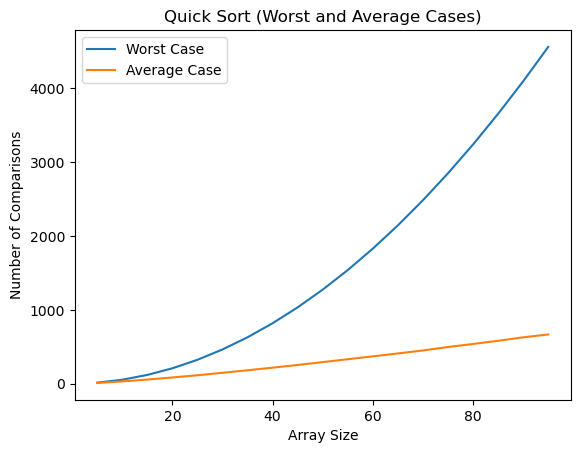

In [74]:
import random

# CODE TO GENERATE WORST CASE
array_sizes = range(5, 100, 5)

# Code for creating an already sorted array
def create_ascending_sorted_array(a_size):
    a = []
    for i in range(a_size):
        a.append(i)
    return a

# Code for creating a random array
def create_random_shuffled_array(a_size):
    a = list(range(a_size))
    random.shuffle(a)
    return a


# Code for running sorting and generating number of compares
num_compares_wc = []
for n in array_sizes:
    a = create_ascending_sorted_array(n)
    nc = quick_sort(a)
    num_compares_wc.append(nc)
    
# Randomized comparisons
num_compares_random = []
num_trials = 1000
for n in array_sizes:
    total = 0
    for m in range(num_trials):
        a = create_random_shuffled_array(n)
        nc = quick_sort(a)
        total = total + nc
    avg = total / num_trials
    num_compares_random.append(avg)
# Code for plotting

plt.plot(array_sizes, num_compares_wc, label='Worst Case')
plt.plot(array_sizes, num_compares_random, label='Average Case')
plt.legend(['Worst Case', 'Average Case'])
plt.title('Quick Sort (Worst and Average Cases)')
plt.xlabel('Array Size')
plt.ylabel('Number of Comparisons')

plt.show()

-----
## Testing Code: Do not edit



In [75]:
def test_sorting_algorithm(sort_fun, sz, num_trials):
    num_passed = 0
    for i in range(num_trials):
        a = create_random_shuffled_array(sz)
        a_orig = list(a) # make a copy
        b = sorted(a)
        nc = sort_fun(a)
        if a == b:
            num_passed = num_passed + 1
        else:
            print('----')
            print('FAILED: Input = ', a_orig)
            print('Expected: ', b)
            print('Obtained:', a)
            print('----')
    print('Num Trials = ', num_trials)
    print('Num Passed = ', num_passed)

In [76]:
test_sorting_algorithm(simple_sort, 50, 100)

Num Trials =  100
Num Passed =  100


In [77]:
test_sorting_algorithm(bubble_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [78]:
test_sorting_algorithm(merge_sort, 10, 10)

Num Trials =  10
Num Passed =  10


In [79]:
test_sorting_algorithm(quick_sort, 10, 10)

Num Trials =  10
Num Passed =  10
